In [212]:
import pandas as pd
import requests
import random
from time import sleep
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import numpy as np
import nltk
import os
from sklearn import datasets
from sklearn.metrics import mean_squared_error
import datetime
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import learning_curve
import matplotlib.style as style

%matplotlib inline
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [213]:
df = pd.read_pickle("Data/Fitbit_and_MFP_Cleaned.pkl")

df.reset_index(inplace=True)

df.head(50)

,Date,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,...,Fiber_Dinner,Sugar_Dinner,Protein_(g)_Dinner,Vitamin_A_Dinner,Vitamin_C_Dinner,Calcium_Dinner,Iron_Dinner,Weight,Net_Calories,Day_of_week
0,2016-12-16,7949.359551,6.100120,1856.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,...,4.801786,9.191071,39.676786,9.469643,16.176786,9.782143,11.300000,NaN,NaN,Friday
1,2016-12-17,5514.820225,4.235007,1855.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,...,4.600000,9.650000,42.591176,13.979412,20.058824,25.000000,24.091176,NaN,NaN,Saturday
2,2016-12-18,4782.921348,3.679812,1855.0,5.146067,15.494382,702.179775,1440.0,85.123596,12.157303,...,5.353488,10.444186,45.627907,17.386047,54.534884,10.860465,23.369767,NaN,-1110.2,Sunday
3,2016-12-19,6743.966292,5.175902,1855.0,4.640449,13.977528,869.786517,1440.0,127.393258,9.348315,...,10.000000,15.000000,5.000000,40.000000,125.000000,10.000000,10.000000,186.800000,-660.1,Monday
4,2016-12-20,7318.181818,5.671428,1854.0,5.215909,15.704545,911.261364,1440.0,148.397727,8.636364,...,1.900000,14.100000,47.700000,18.000000,48.800000,2.500000,25.400000,186.483333,-154.3,Tuesday
5,2016-12-21,7112.386364,5.472372,1854.0,3.909091,11.761364,899.102273,1440.0,155.465909,7.477273,...,4.378022,8.345055,42.856044,11.289011,16.280220,11.697802,21.106593,186.166667,-978.3,Wednesday
6,2016-12-22,7365.511364,5.715491,1854.0,4.420455,13.284091,857.477273,1440.0,145.545455,6.340909,...,4.000000,6.942857,31.000000,9.000000,12.935065,24.000000,23.000000,185.850000,-142.5,Thursday
7,2016-12-23,7949.359551,6.100120,1853.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,...,4.801786,9.191071,39.676786,9.469643,16.176786,9.782143,11.300000,185.533333,-1036.9,Friday
8,2016-12-24,5514.820225,4.235007,1853.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,...,4.600000,9.650000,42.591176,13.979412,20.058824,25.000000,24.091176,185.216667,-903.0,Saturday
9,2016-12-25,1178.000000,0.882320,2074.0,3.000000,9.000000,268.000000,1368.0,72.000000,12.157303,...,5.353488,10.444186,45.627907,17.386047,54.534884,10.860465,23.369767,184.900000,NaN,Sunday


In [37]:
## INTERPOLATING WEIGHTS THAT ARE MISSING

df.Weight = df.Weight.interpolate(method='linear')
df.drop('Day_of_week', axis=1, inplace=True)

df.head(562)

,Date,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,...,Carbohydrates_(g)_Dinner,Fiber_Dinner,Sugar_Dinner,Protein_(g)_Dinner,Vitamin_A_Dinner,Vitamin_C_Dinner,Calcium_Dinner,Iron_Dinner,Weight,Net_Calories
0,2016-12-16,7949.359551,6.100120,1856.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,...,52.296429,4.801786,9.191071,39.676786,9.469643,16.176786,9.782143,11.300000,NaN,NaN
1,2016-12-17,5514.820225,4.235007,1855.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,...,59.961765,4.600000,9.650000,42.591176,13.979412,20.058824,25.000000,24.091176,NaN,NaN
2,2016-12-18,4782.921348,3.679812,1855.0,5.146067,15.494382,702.179775,1440.0,85.123596,12.157303,...,71.923256,5.353488,10.444186,45.627907,17.386047,54.534884,10.860465,23.369767,NaN,-1110.2
3,2016-12-19,6743.966292,5.175902,1855.0,4.640449,13.977528,869.786517,1440.0,127.393258,9.348315,...,30.000000,10.000000,15.000000,5.000000,40.000000,125.000000,10.000000,10.000000,186.800000,-660.1
4,2016-12-20,7318.181818,5.671428,1854.0,5.215909,15.704545,911.261364,1440.0,148.397727,8.636364,...,44.000000,1.900000,14.100000,47.700000,18.000000,48.800000,2.500000,25.400000,186.483333,-154.3
5,2016-12-21,7112.386364,5.472372,1854.0,3.909091,11.761364,899.102273,1440.0,155.465909,7.477273,...,56.232967,4.378022,8.345055,42.856044,11.289011,16.280220,11.697802,21.106593,186.166667,-978.3
6,2016-12-22,7365.511364,5.715491,1854.0,4.420455,13.284091,857.477273,1440.0,145.545455,6.340909,...,72.000000,4.000000,6.942857,31.000000,9.000000,12.935065,24.000000,23.000000,185.850000,-142.5
7,2016-12-23,7949.359551,6.100120,1853.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,...,52.296429,4.801786,9.191071,39.676786,9.469643,16.176786,9.782143,11.300000,185.533333,-1036.9
8,2016-12-24,5514.820225,4.235007,1853.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,...,59.961765,4.600000,9.650000,42.591176,13.979412,20.058824,25.000000,24.091176,185.216667,-903.0
9,2016-12-25,1178.000000,0.882320,2074.0,3.000000,9.000000,268.000000,1368.0,72.000000,12.157303,...,71.923256,5.353488,10.444186,45.627907,17.386047,54.534884,10.860465,23.369767,184.900000,NaN


In [38]:
sixty_percent = int(np.ceil(0.95*len(df)))

train_df = df[:575]

holdout_df = df[575:]

In [39]:
prophet = Prophet(mcmc_samples=100,changepoint_range=0.9)

pro_train_df = train_df[['Date','Weight']]

pro_train_df.rename(columns={"Date": "ds", "Weight": "y"}, inplace=True)

pro_train_df

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,ds,y
0,2016-12-16,NaN
1,2016-12-17,NaN
2,2016-12-18,NaN
3,2016-12-19,186.800000
4,2016-12-20,186.483333
5,2016-12-21,186.166667
6,2016-12-22,185.850000
7,2016-12-23,185.533333
8,2016-12-24,185.216667
9,2016-12-25,184.900000


In [40]:
df['Steps']

0       7949.359551
1       5514.820225
2       4782.921348
3       6743.966292
4       7318.181818
5       7112.386364
6       7365.511364
7       7949.359551
8       5514.820225
9       1178.000000
10      4058.000000
11      6378.000000
12      9507.000000
13      6472.000000
14      2989.000000
15       784.000000
16       137.000000
17      4791.000000
18      5224.000000
19      7864.000000
20      4709.000000
21     13146.000000
22      3002.000000
23      4392.000000
24      5423.000000
25     10152.000000
26      9289.000000
27      6284.000000
28     13866.000000
29      5606.000000
           ...     
590     4782.921348
591     6743.966292
592     3985.000000
593     4173.000000
594     7469.000000
595    10066.000000
596     8927.000000
597     2260.000000
598     7036.000000
599    10049.000000
600     9404.000000
601     3897.000000
602     7947.000000
603     3713.000000
604     9530.000000
605     9455.000000
606     5213.000000
607      284.000000
608     7299.000000


In [41]:
train_extra_df = train_df[['Steps','Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
       'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
       'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
       'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Sodium_(mg)_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
       'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
       'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
       'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
       'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner']]

extra_regressors = ['Steps','Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
       'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
       'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
       'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Sodium_(mg)_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
       'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
       'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
       'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
       'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner']

for i in extra_regressors:
    pro_train_df[i] = train_extra_df[i]

pro_train_df

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,ds,y,Steps,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Calories_Breakfast,Saturated_Fat_Breakfast,Cholesterol_Breakfast,...,Calories_Dinner,Saturated_Fat_Dinner,Polyunsaturated_Fat_Dinner,Monounsaturated_Fat_Dinner,Trans_Fat_Dinner,Cholesterol_Dinner,Sodium_(mg)_Dinner,Carbohydrates_(g)_Dinner,Sugar_Dinner,Protein_(g)_Dinner
0,2016-12-16,NaN,7949.359551,1440.0,180.853933,8.977528,16.202247,374.499107,5.857143,103.657143,...,612.128571,7.269643,0.666071,1.314286,0.255357,114.707143,1050.707143,52.296429,9.191071,39.676786
1,2016-12-17,NaN,5514.820225,1440.0,102.426966,13.404494,23.292135,531.626667,9.585333,351.065333,...,686.482353,12.223529,0.697059,0.744118,0.282353,100.432353,1114.300000,59.961765,9.650000,42.591176
2,2016-12-18,NaN,4782.921348,1440.0,85.123596,12.157303,24.078652,352.400000,7.700000,45.000000,...,864.811628,11.144186,1.827907,5.158140,0.286047,147.553488,1565.016279,71.923256,10.444186,45.627907
3,2016-12-19,186.800000,6743.966292,1440.0,127.393258,9.348315,23.853933,244.400000,3.000000,20.000000,...,175.000000,7.760870,1.098551,2.750725,0.644928,127.798551,125.000000,30.000000,15.000000,5.000000
4,2016-12-20,186.483333,7318.181818,1440.0,148.397727,8.636364,17.397727,520.000000,3.000000,20.000000,...,519.700000,2.300000,0.300000,2.720430,0.054839,90.000000,4337.200000,44.000000,14.100000,47.700000
5,2016-12-21,186.166667,7112.386364,1440.0,155.465909,7.477273,14.261364,875.700000,18.600000,599.300000,...,653.856044,7.624176,1.374725,2.995604,0.126374,115.581319,1219.056044,56.232967,8.345055,42.856044
6,2016-12-22,185.850000,7365.511364,1440.0,145.545455,6.340909,14.215909,472.500000,3.000000,20.000000,...,629.000000,11.500000,1.006494,2.612987,0.097403,100.000000,165.000000,72.000000,6.942857,31.000000
7,2016-12-23,185.533333,7949.359551,1440.0,180.853933,8.977528,16.202247,336.100000,5.500000,35.000000,...,612.128571,7.269643,0.666071,1.314286,0.255357,114.707143,1050.707143,52.296429,9.191071,39.676786
8,2016-12-24,185.216667,5514.820225,1440.0,102.426966,13.404494,23.292135,410.000000,5.800000,11.700000,...,686.482353,12.223529,0.697059,0.744118,0.282353,100.432353,1114.300000,59.961765,9.650000,42.591176
9,2016-12-25,184.900000,1178.000000,1368.0,72.000000,12.157303,24.078652,503.229231,8.149231,308.261538,...,864.811628,11.144186,1.827907,5.158140,0.286047,147.553488,1565.016279,71.923256,10.444186,45.627907


In [42]:
pro_train_df['floor'] = 170

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
for i in extra_regressors:
    prophet.add_regressor(i)

prophet.fit(pro_train_df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [44]:
future = prophet.make_future_dataframe(periods=len(holdout_df))
#future.set_index('ds', inplace=True)
future

,ds
0,2016-12-16
1,2016-12-17
2,2016-12-18
3,2016-12-19
4,2016-12-20
5,2016-12-21
6,2016-12-22
7,2016-12-23
8,2016-12-24
9,2016-12-25


In [45]:
#df.set_index('Date', inplace=True)

steps_regressors_df = df[['Date','Steps','Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
       'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
       'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
       'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Sodium_(mg)_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
       'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
       'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
       'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
       'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner']]

scalable_columns = ['Steps','Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
       'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
       'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
       'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Sodium_(mg)_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
       'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
       'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
       'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
       'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner']

In [46]:
future = future.merge(steps_regressors_df, left_on='ds', right_on='Date', how='left')

In [47]:
future.drop(columns=['Date'], inplace=True)

future['floor'] = 170

future

,ds,Steps,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Calories_Breakfast,Saturated_Fat_Breakfast,Cholesterol_Breakfast,Polyunsaturated_Fat_Breakfast,...,Saturated_Fat_Dinner,Polyunsaturated_Fat_Dinner,Monounsaturated_Fat_Dinner,Trans_Fat_Dinner,Cholesterol_Dinner,Sodium_(mg)_Dinner,Carbohydrates_(g)_Dinner,Sugar_Dinner,Protein_(g)_Dinner,floor
0,2016-12-16,7949.359551,1440.0,180.853933,8.977528,16.202247,374.499107,5.857143,103.657143,1.047321,...,7.269643,0.666071,1.314286,0.255357,114.707143,1050.707143,52.296429,9.191071,39.676786,170
1,2016-12-17,5514.820225,1440.0,102.426966,13.404494,23.292135,531.626667,9.585333,351.065333,1.756000,...,12.223529,0.697059,0.744118,0.282353,100.432353,1114.300000,59.961765,9.650000,42.591176,170
2,2016-12-18,4782.921348,1440.0,85.123596,12.157303,24.078652,352.400000,7.700000,45.000000,0.600000,...,11.144186,1.827907,5.158140,0.286047,147.553488,1565.016279,71.923256,10.444186,45.627907,170
3,2016-12-19,6743.966292,1440.0,127.393258,9.348315,23.853933,244.400000,3.000000,20.000000,1.255172,...,7.760870,1.098551,2.750725,0.644928,127.798551,125.000000,30.000000,15.000000,5.000000,170
4,2016-12-20,7318.181818,1440.0,148.397727,8.636364,17.397727,520.000000,3.000000,20.000000,1.000000,...,2.300000,0.300000,2.720430,0.054839,90.000000,4337.200000,44.000000,14.100000,47.700000,170
5,2016-12-21,7112.386364,1440.0,155.465909,7.477273,14.261364,875.700000,18.600000,599.300000,7.600000,...,7.624176,1.374725,2.995604,0.126374,115.581319,1219.056044,56.232967,8.345055,42.856044,170
6,2016-12-22,7365.511364,1440.0,145.545455,6.340909,14.215909,472.500000,3.000000,20.000000,0.900000,...,11.500000,1.006494,2.612987,0.097403,100.000000,165.000000,72.000000,6.942857,31.000000,170
7,2016-12-23,7949.359551,1440.0,180.853933,8.977528,16.202247,336.100000,5.500000,35.000000,1.047321,...,7.269643,0.666071,1.314286,0.255357,114.707143,1050.707143,52.296429,9.191071,39.676786,170
8,2016-12-24,5514.820225,1440.0,102.426966,13.404494,23.292135,410.000000,5.800000,11.700000,1.756000,...,12.223529,0.697059,0.744118,0.282353,100.432353,1114.300000,59.961765,9.650000,42.591176,170
9,2016-12-25,1178.000000,1368.0,72.000000,12.157303,24.078652,503.229231,8.149231,308.261538,1.404615,...,11.144186,1.827907,5.158140,0.286047,147.553488,1565.016279,71.923256,10.444186,45.627907,170


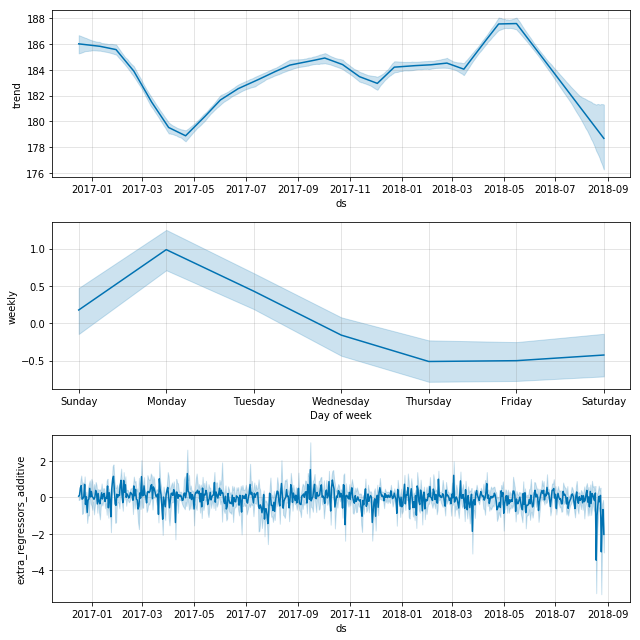

In [48]:
forecast = prophet.predict(future)
fig = prophet.plot_components(forecast)

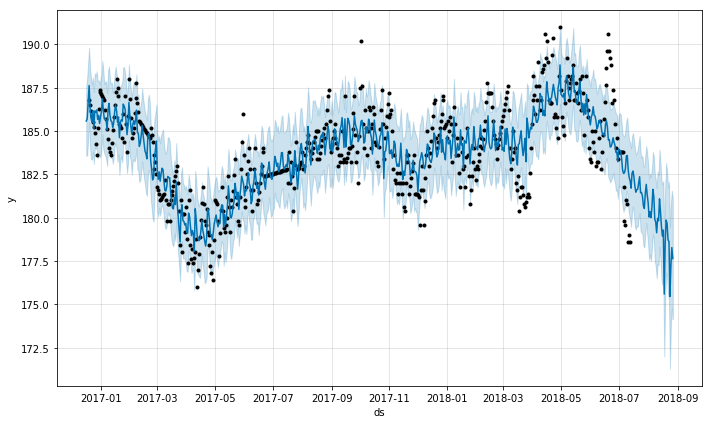

In [49]:
fig1 = prophet.plot(forecast)

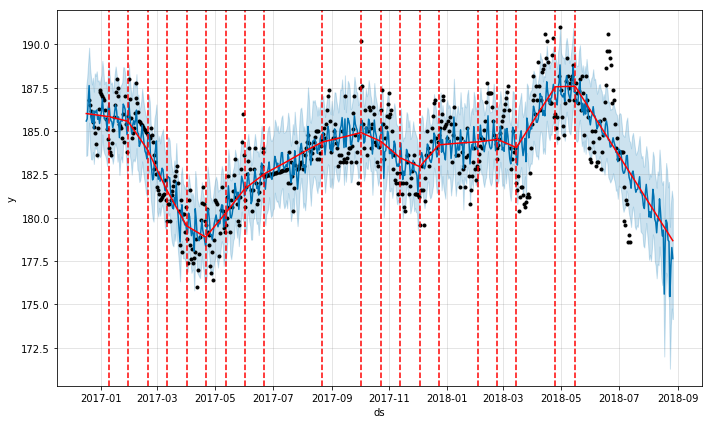

In [50]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)

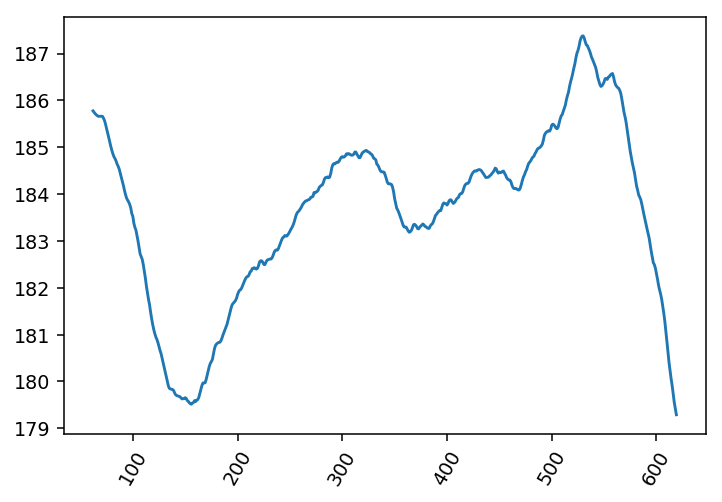

In [51]:
#df.set_index('Date', inplace=True)
df["Weight_MA60"] = df.Weight.rolling(window=60).mean()
plt.figure(dpi=138)
plt.plot(df.Weight_MA60)
plt.xticks(rotation=60);

In [52]:
len(holdout_df)

45

In [53]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Calories_Breakfast,Calories_Breakfast_lower,Calories_Breakfast_upper,Calories_Dinner,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-12-16,186.014727,183.563919,187.609668,185.277094,186.690594,-0.046333,-0.134713,0.042960,0.120041,...,0.070010,-0.141900,0.282402,-0.500755,-0.772576,-0.251901,0.0,0.0,0.0,185.583982
1,2016-12-17,186.007385,183.609568,188.096218,185.293783,186.664203,0.139448,-0.129295,0.405446,0.023334,...,0.128500,-0.112813,0.329180,-0.425044,-0.711686,-0.140398,0.0,0.0,0.0,185.710840
2,2016-12-18,186.000042,184.586898,188.967603,185.311487,186.637811,-0.072462,-0.210683,0.067186,-0.208608,...,0.524052,0.084301,0.920898,0.178256,-0.143734,0.473283,0.0,0.0,0.0,186.702350
3,2016-12-19,185.992700,185.492920,189.815458,185.329230,186.611420,-0.200156,-0.581956,0.185584,0.688588,...,0.650367,0.090773,1.203087,0.987014,0.710789,1.251559,0.0,0.0,0.0,187.630081
4,2016-12-20,185.985357,184.057679,188.645426,185.356295,186.585029,0.125701,-0.116549,0.365477,0.240258,...,-0.091411,-0.904360,0.706407,0.430498,0.190298,0.672110,0.0,0.0,0.0,186.324444
5,2016-12-21,185.978014,183.380317,188.086628,185.380247,186.558190,0.546264,-0.506495,1.588269,0.065769,...,-0.049037,-0.861539,0.829456,-0.158301,-0.434911,0.079743,0.0,0.0,0.0,185.770676
6,2016-12-22,185.970672,183.356612,187.689997,185.411632,186.529936,0.069539,-0.064476,0.202186,0.098098,...,0.048159,-0.471659,0.505433,-0.511668,-0.783882,-0.228734,0.0,0.0,0.0,185.507163
7,2016-12-23,185.963329,183.798990,188.084877,185.436299,186.505855,-0.091734,-0.266718,0.085056,0.120041,...,0.715914,0.283915,1.154967,-0.500755,-0.772576,-0.251901,0.0,0.0,0.0,186.178488
8,2016-12-24,185.955987,183.106595,187.276752,185.454123,186.479463,-0.004358,-0.012671,0.004041,0.023334,...,-0.380466,-0.852724,0.061758,-0.425044,-0.711686,-0.140398,0.0,0.0,0.0,185.150476
9,2016-12-25,185.948644,184.071599,188.331787,185.457326,186.465647,0.105872,-0.098164,0.307824,-0.208608,...,0.034795,-0.232571,0.313455,0.178256,-0.143734,0.473283,0.0,0.0,0.0,186.161695


In [54]:
forecast.columns[-13:]

Index(['additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'extra_regressors_additive', 'extra_regressors_additive_lower',
       'extra_regressors_additive_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [55]:
forecast[['additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'extra_regressors_additive', 'extra_regressors_additive_lower',
       'extra_regressors_additive_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat', 'yhat_lower', 'yhat_upper']]

,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,yhat_lower,yhat_upper
0,-0.430745,-0.729360,-0.117575,0.070010,-0.141900,0.282402,-0.500755,-0.772576,-0.251901,0.0,0.0,0.0,185.583982,183.563919,187.609668
1,-0.296545,-0.548064,-0.011569,0.128500,-0.112813,0.329180,-0.425044,-0.711686,-0.140398,0.0,0.0,0.0,185.710840,183.609568,188.096218
2,0.702308,0.310783,1.133429,0.524052,0.084301,0.920898,0.178256,-0.143734,0.473283,0.0,0.0,0.0,186.702350,184.586898,188.967603
3,1.637381,0.989657,2.250751,0.650367,0.090773,1.203087,0.987014,0.710789,1.251559,0.0,0.0,0.0,187.630081,185.492920,189.815458
4,0.339087,-0.474552,1.125779,-0.091411,-0.904360,0.706407,0.430498,0.190298,0.672110,0.0,0.0,0.0,186.324444,184.057679,188.645426
5,-0.207338,-1.063442,0.639426,-0.049037,-0.861539,0.829456,-0.158301,-0.434911,0.079743,0.0,0.0,0.0,185.770676,183.380317,188.086628
6,-0.463509,-1.082339,0.039398,0.048159,-0.471659,0.505433,-0.511668,-0.783882,-0.228734,0.0,0.0,0.0,185.507163,183.356612,187.689997
7,0.215158,-0.269135,0.753678,0.715914,0.283915,1.154967,-0.500755,-0.772576,-0.251901,0.0,0.0,0.0,186.178488,183.798990,188.084877
8,-0.805510,-1.330022,-0.246336,-0.380466,-0.852724,0.061758,-0.425044,-0.711686,-0.140398,0.0,0.0,0.0,185.150476,183.106595,187.276752
9,0.213050,-0.058600,0.485838,0.034795,-0.232571,0.313455,0.178256,-0.143734,0.473283,0.0,0.0,0.0,186.161695,184.071599,188.331787


In [56]:
forecast.to_pickle("Data/Prophet_Forecast.pkl")

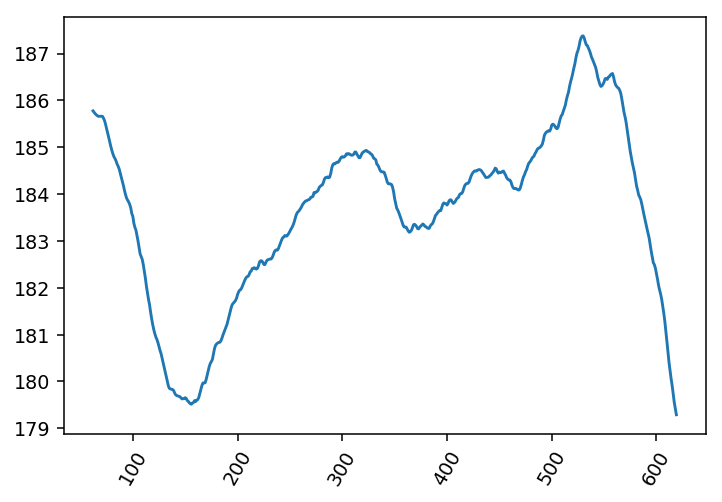

In [57]:
df["Weight_MA60"] = df.Weight.rolling(window=60).mean()
plt.figure(dpi=138)
plt.plot(df.Weight_MA60)
plt.xticks(rotation=60);

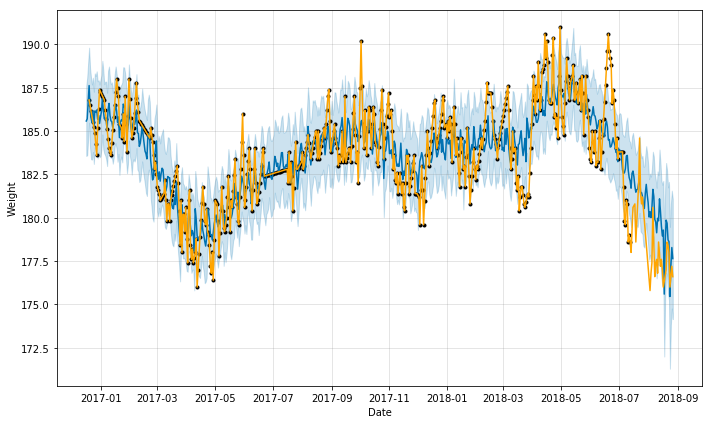

In [58]:
fig1 = prophet.plot(forecast)
df.set_index('Date', inplace=True)
fig1 = plt.plot(df.Weight, color='orange')
fig1 = plt.ylabel('Weight')
fig1 = plt.xlabel('Date')

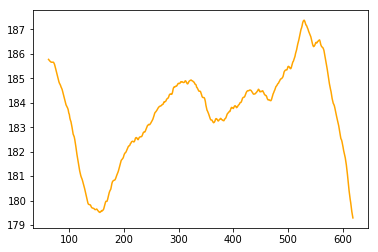

In [25]:
plt.plot(df.Weight_MA60, color='orange')

In [26]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(prophet, horizon = '30 days')
df_cv.head()

INFO:fbprophet.diagnostics:Making 31 forecasts with cutoffs between 2017-03-20 00:00:00 and 2018-06-13 00:00:00
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pystan/misc.py:456: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if "chain_id" in inspect.getargspec(init).args:


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-03-21,180.922947,178.989001,182.782687,182.714286,2017-03-20
1,2017-03-22,180.597563,179.195624,182.056054,183.000000,2017-03-20
2,2017-03-23,180.958333,179.512159,182.409887,182.000000,2017-03-20
3,2017-03-24,183.537441,181.852485,185.151462,180.400000,2017-03-20
4,2017-03-25,181.986055,179.972533,183.905619,178.400000,2017-03-20


In [27]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
692,3 days,4.675990,2.162404,1.701200,0.009200,0.623656
363,4 days,4.665469,2.159970,1.697997,0.009182,0.612903
33,4 days,4.610098,2.147114,1.684232,0.009106,0.612903
543,4 days,4.751419,2.179775,1.706148,0.009224,0.612903
183,4 days,4.795334,2.189825,1.720734,0.009302,0.602151


In [80]:
df_p.horizon.value_counts()

17 days    31
6 days     31
11 days    31
22 days    31
5 days     31
16 days    31
27 days    31
10 days    31
21 days    31
4 days     31
15 days    31
26 days    31
9 days     31
20 days    31
28 days    31
14 days    31
25 days    31
8 days     31
19 days    31
30 days    31
13 days    31
24 days    31
7 days     31
18 days    31
29 days    31
12 days    31
23 days    31
3 days      1
Name: horizon, dtype: int64

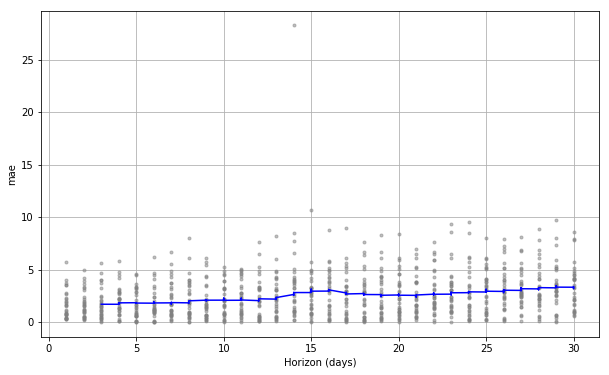

In [28]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')

In [33]:
df_cv.tail(31)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
899,2018-06-28,188.866533,186.194396,191.438252,184.000,2018-05-29
900,2018-06-14,184.390427,182.574604,186.303404,184.750,2018-06-13
901,2018-06-15,184.445809,182.358070,186.358536,185.725,2018-06-13
902,2018-06-16,184.283403,182.294509,186.254078,186.700,2018-06-13
903,2018-06-17,185.027599,183.099876,186.962567,187.675,2018-06-13
904,2018-06-18,185.282803,183.354697,187.280089,188.650,2018-06-13
905,2018-06-19,184.937589,182.908479,186.990145,189.625,2018-06-13
906,2018-06-20,183.944933,181.948958,185.903043,190.600,2018-06-13
907,2018-06-21,183.482827,181.324245,185.625683,189.600,2018-06-13
908,2018-06-22,183.748544,181.752681,185.775529,189.200,2018-06-13


In [30]:
np.mean(df_p.mae)

2.5422391687854917

In [31]:
len(df_p)

838

In [61]:
df.reset_index(inplace=True)

In [137]:
prophet_final = Prophet(mcmc_samples=100,changepoint_range=.9)

pro_final_df = df[['Date','Weight']]

pro_final_df.rename(columns={"Date": "ds", "Weight": "y"}, inplace=True)

pro_final_df

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,ds,y
0,2016-12-16,NaN
1,2016-12-17,NaN
2,2016-12-18,NaN
3,2016-12-19,186.800000
4,2016-12-20,186.483333
5,2016-12-21,186.166667
6,2016-12-22,185.850000
7,2016-12-23,185.533333
8,2016-12-24,185.216667
9,2016-12-25,184.900000


In [138]:
extra_regressors = ['Steps','Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
       'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
       'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
       'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Sodium_(mg)_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
       'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
       'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
       'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
       'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner']

final_extra_df = df[['Date','Steps','Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
       'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
       'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
       'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Sodium_(mg)_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
       'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
       'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
       'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
       'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner']]

for i in extra_regressors:
    pro_final_df[i] = final_extra_df[i]

pro_final_df['floor'] = 170
pro_final_df['cap'] = 200

pro_final_df

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

,ds,y,Steps,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Calories_Breakfast,Saturated_Fat_Breakfast,Cholesterol_Breakfast,...,Polyunsaturated_Fat_Dinner,Monounsaturated_Fat_Dinner,Trans_Fat_Dinner,Cholesterol_Dinner,Sodium_(mg)_Dinner,Carbohydrates_(g)_Dinner,Sugar_Dinner,Protein_(g)_Dinner,floor,cap
0,2016-12-16,NaN,7949.359551,1440.0,180.853933,8.977528,16.202247,374.499107,5.857143,103.657143,...,0.666071,1.314286,0.255357,114.707143,1050.707143,52.296429,9.191071,39.676786,170,200
1,2016-12-17,NaN,5514.820225,1440.0,102.426966,13.404494,23.292135,531.626667,9.585333,351.065333,...,0.697059,0.744118,0.282353,100.432353,1114.300000,59.961765,9.650000,42.591176,170,200
2,2016-12-18,NaN,4782.921348,1440.0,85.123596,12.157303,24.078652,352.400000,7.700000,45.000000,...,1.827907,5.158140,0.286047,147.553488,1565.016279,71.923256,10.444186,45.627907,170,200
3,2016-12-19,186.800000,6743.966292,1440.0,127.393258,9.348315,23.853933,244.400000,3.000000,20.000000,...,1.098551,2.750725,0.644928,127.798551,125.000000,30.000000,15.000000,5.000000,170,200
4,2016-12-20,186.483333,7318.181818,1440.0,148.397727,8.636364,17.397727,520.000000,3.000000,20.000000,...,0.300000,2.720430,0.054839,90.000000,4337.200000,44.000000,14.100000,47.700000,170,200
5,2016-12-21,186.166667,7112.386364,1440.0,155.465909,7.477273,14.261364,875.700000,18.600000,599.300000,...,1.374725,2.995604,0.126374,115.581319,1219.056044,56.232967,8.345055,42.856044,170,200
6,2016-12-22,185.850000,7365.511364,1440.0,145.545455,6.340909,14.215909,472.500000,3.000000,20.000000,...,1.006494,2.612987,0.097403,100.000000,165.000000,72.000000,6.942857,31.000000,170,200
7,2016-12-23,185.533333,7949.359551,1440.0,180.853933,8.977528,16.202247,336.100000,5.500000,35.000000,...,0.666071,1.314286,0.255357,114.707143,1050.707143,52.296429,9.191071,39.676786,170,200
8,2016-12-24,185.216667,5514.820225,1440.0,102.426966,13.404494,23.292135,410.000000,5.800000,11.700000,...,0.697059,0.744118,0.282353,100.432353,1114.300000,59.961765,9.650000,42.591176,170,200
9,2016-12-25,184.900000,1178.000000,1368.0,72.000000,12.157303,24.078652,503.229231,8.149231,308.261538,...,1.827907,5.158140,0.286047,147.553488,1565.016279,71.923256,10.444186,45.627907,170,200


In [139]:
for i in extra_regressors:
    prophet_final.add_regressor(i)

prophet_final.fit(pro_final_df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [140]:
pro_final_df.tail()

,ds,y,Steps,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Calories_Breakfast,Saturated_Fat_Breakfast,Cholesterol_Breakfast,...,Polyunsaturated_Fat_Dinner,Monounsaturated_Fat_Dinner,Trans_Fat_Dinner,Cholesterol_Dinner,Sodium_(mg)_Dinner,Carbohydrates_(g)_Dinner,Sugar_Dinner,Protein_(g)_Dinner,floor,cap
615,2018-08-23,178.0,10359.0,710.0,159.0,38.000000,52.000000,435.0,14.0,260.000000,...,1.006494,2.612987,0.097403,96.251948,882.441558,50.418182,6.942857,47.597403,170,200
616,2018-08-24,176.0,8696.0,820.0,221.0,39.000000,24.000000,155.0,1.5,10.000000,...,0.666071,1.314286,7.000000,84.000000,2100.000000,77.000000,9.191071,51.300000,170,200
617,2018-08-25,176.6,165.0,757.0,15.0,13.404494,23.292135,540.0,2.0,351.065333,...,0.697059,0.744118,0.282353,83.100000,2091.900000,103.300000,2.200000,45.200000,170,200
618,2018-08-26,177.2,13286.0,1247.0,103.0,9.000000,81.000000,669.1,15.6,410.900000,...,1.827907,5.158140,0.286047,50.000000,2020.000000,72.700000,15.000000,22.700000,170,200
619,2018-08-27,176.6,6360.0,1254.0,134.0,29.000000,23.000000,613.3,2.7,126.706034,...,1.098551,2.400000,0.644928,75.200000,676.000000,164.600000,6.000000,30.600000,170,200


In [150]:
example = {
  'Steps': 0.0,  # float
  'Minutes_Sedentary': 0.0,    # M or F
  'Minutes_Lightly_Active': 0.0,    # int
  'Minutes_Fairly_Active': 0.0,  # int
  'Minutes_Very_Active': 0.0,  # int
  'Saturated_Fat_Breakfast': 1.0,    # float
  'Cholesterol_Breakfast': 0.0,  # int
  'Polyunsaturated_Fat_Breakfast': 1.0,    # M or F
  'Monounsaturated_Fat_Breakfast': 0.0,    # int
  'Trans_Fat_Breakfast': 1.0,  # int
  'Carbohydrates_(g)_Breakfast': 0.0,  # int
  'Sugar_Breakfast': 0.0,    # float
  'Sodium_(mg)_Breakfast': 0.0,  # int
  'Protein_(g)_Breakfast': 1.0,    # M or F
  'Calories_Lunch': 0.0,    # int
  'Saturated_Fat_Lunch': 0.0,  # float
  'Polyunsaturated_Fat_Lunch': 0.0,    # M or F
  'Minutes_Lightly_Active': 0.0,    # int
  'Minutes_Fairly_Active': 0.0,  # int
  'Minutes_Very_Active': 0.0,  # int
  'Saturated_Fat_Breakfast': 1.0,    # float
  'Cholesterol_Breakfast': 0.0,  # int
  'Polyunsaturated_Fat_Breakfast': 1.0,    # M or F
  'Monounsaturated_Fat_Breakfast': 0.0,    # int
  'Trans_Fat_Breakfast': 1.0,  # int
  'Carbohydrates_(g)_Breakfast': 0.0,  # int
  'Sugar_Breakfast': 0.0,    # float
  'Sodium_(mg)_Breakfast': 0.0,  # int
  'Protein_(g)_Breakfast': 1.0,    # M or F
  'Calories_Lunch': 0.0,   # int
}

def prophet_forecast(df, periods, features, cap=None, floor=170):
    future = prophet_final.make_future_dataframe(periods=periods)
    future['floor'] = 170
    
    steps_regressors_df = df[['Date','Steps','Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
       'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
       'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
       'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Sodium_(mg)_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
       'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
       'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
       'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
       'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner']]

    future = future.merge(steps_regressors_df, left_on='ds', right_on='Date', how='left')
    
    for i in scalable_columns:
        future[i].iloc[-periods:] = df[i].mean()
        
    forecast = prophet_final.predict(future)
        
    return forecast

In [142]:
future = prophet_final.make_future_dataframe(periods=60)

future['floor'] = 170
future['cap'] = 200

future

,ds,floor,cap
0,2016-12-16,170,200
1,2016-12-17,170,200
2,2016-12-18,170,200
3,2016-12-19,170,200
4,2016-12-20,170,200
5,2016-12-21,170,200
6,2016-12-22,170,200
7,2016-12-23,170,200
8,2016-12-24,170,200
9,2016-12-25,170,200


In [143]:
steps_regressors_df = df[['Date','Steps','Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
       'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
       'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
       'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Sodium_(mg)_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
       'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
       'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
       'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
       'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner']]

future = future.merge(steps_regressors_df, left_on='ds', right_on='Date', how='left')

In [144]:
future

,ds,floor,cap,Date,Steps,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Calories_Breakfast,...,Calories_Dinner,Saturated_Fat_Dinner,Polyunsaturated_Fat_Dinner,Monounsaturated_Fat_Dinner,Trans_Fat_Dinner,Cholesterol_Dinner,Sodium_(mg)_Dinner,Carbohydrates_(g)_Dinner,Sugar_Dinner,Protein_(g)_Dinner
0,2016-12-16,170,200,2016-12-16,7949.359551,1440.0,180.853933,8.977528,16.202247,374.499107,...,612.128571,7.269643,0.666071,1.314286,0.255357,114.707143,1050.707143,52.296429,9.191071,39.676786
1,2016-12-17,170,200,2016-12-17,5514.820225,1440.0,102.426966,13.404494,23.292135,531.626667,...,686.482353,12.223529,0.697059,0.744118,0.282353,100.432353,1114.300000,59.961765,9.650000,42.591176
2,2016-12-18,170,200,2016-12-18,4782.921348,1440.0,85.123596,12.157303,24.078652,352.400000,...,864.811628,11.144186,1.827907,5.158140,0.286047,147.553488,1565.016279,71.923256,10.444186,45.627907
3,2016-12-19,170,200,2016-12-19,6743.966292,1440.0,127.393258,9.348315,23.853933,244.400000,...,175.000000,7.760870,1.098551,2.750725,0.644928,127.798551,125.000000,30.000000,15.000000,5.000000
4,2016-12-20,170,200,2016-12-20,7318.181818,1440.0,148.397727,8.636364,17.397727,520.000000,...,519.700000,2.300000,0.300000,2.720430,0.054839,90.000000,4337.200000,44.000000,14.100000,47.700000
5,2016-12-21,170,200,2016-12-21,7112.386364,1440.0,155.465909,7.477273,14.261364,875.700000,...,653.856044,7.624176,1.374725,2.995604,0.126374,115.581319,1219.056044,56.232967,8.345055,42.856044
6,2016-12-22,170,200,2016-12-22,7365.511364,1440.0,145.545455,6.340909,14.215909,472.500000,...,629.000000,11.500000,1.006494,2.612987,0.097403,100.000000,165.000000,72.000000,6.942857,31.000000
7,2016-12-23,170,200,2016-12-23,7949.359551,1440.0,180.853933,8.977528,16.202247,336.100000,...,612.128571,7.269643,0.666071,1.314286,0.255357,114.707143,1050.707143,52.296429,9.191071,39.676786
8,2016-12-24,170,200,2016-12-24,5514.820225,1440.0,102.426966,13.404494,23.292135,410.000000,...,686.482353,12.223529,0.697059,0.744118,0.282353,100.432353,1114.300000,59.961765,9.650000,42.591176
9,2016-12-25,170,200,2016-12-25,1178.000000,1368.0,72.000000,12.157303,24.078652,503.229231,...,864.811628,11.144186,1.827907,5.158140,0.286047,147.553488,1565.016279,71.923256,10.444186,45.627907


In [145]:
for i in scalable_columns:
    future[i].iloc[-60:] = df[i].mean()

future

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,ds,floor,cap,Date,Steps,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Calories_Breakfast,...,Calories_Dinner,Saturated_Fat_Dinner,Polyunsaturated_Fat_Dinner,Monounsaturated_Fat_Dinner,Trans_Fat_Dinner,Cholesterol_Dinner,Sodium_(mg)_Dinner,Carbohydrates_(g)_Dinner,Sugar_Dinner,Protein_(g)_Dinner
0,2016-12-16,170,200,2016-12-16,7949.359551,1440.000000,180.853933,8.977528,16.202247,374.499107,...,612.128571,7.269643,0.666071,1.314286,0.255357,114.707143,1050.707143,52.296429,9.191071,39.676786
1,2016-12-17,170,200,2016-12-17,5514.820225,1440.000000,102.426966,13.404494,23.292135,531.626667,...,686.482353,12.223529,0.697059,0.744118,0.282353,100.432353,1114.300000,59.961765,9.650000,42.591176
2,2016-12-18,170,200,2016-12-18,4782.921348,1440.000000,85.123596,12.157303,24.078652,352.400000,...,864.811628,11.144186,1.827907,5.158140,0.286047,147.553488,1565.016279,71.923256,10.444186,45.627907
3,2016-12-19,170,200,2016-12-19,6743.966292,1440.000000,127.393258,9.348315,23.853933,244.400000,...,175.000000,7.760870,1.098551,2.750725,0.644928,127.798551,125.000000,30.000000,15.000000,5.000000
4,2016-12-20,170,200,2016-12-20,7318.181818,1440.000000,148.397727,8.636364,17.397727,520.000000,...,519.700000,2.300000,0.300000,2.720430,0.054839,90.000000,4337.200000,44.000000,14.100000,47.700000
5,2016-12-21,170,200,2016-12-21,7112.386364,1440.000000,155.465909,7.477273,14.261364,875.700000,...,653.856044,7.624176,1.374725,2.995604,0.126374,115.581319,1219.056044,56.232967,8.345055,42.856044
6,2016-12-22,170,200,2016-12-22,7365.511364,1440.000000,145.545455,6.340909,14.215909,472.500000,...,629.000000,11.500000,1.006494,2.612987,0.097403,100.000000,165.000000,72.000000,6.942857,31.000000
7,2016-12-23,170,200,2016-12-23,7949.359551,1440.000000,180.853933,8.977528,16.202247,336.100000,...,612.128571,7.269643,0.666071,1.314286,0.255357,114.707143,1050.707143,52.296429,9.191071,39.676786
8,2016-12-24,170,200,2016-12-24,5514.820225,1440.000000,102.426966,13.404494,23.292135,410.000000,...,686.482353,12.223529,0.697059,0.744118,0.282353,100.432353,1114.300000,59.961765,9.650000,42.591176
9,2016-12-25,170,200,2016-12-25,1178.000000,1368.000000,72.000000,12.157303,24.078652,503.229231,...,864.811628,11.144186,1.827907,5.158140,0.286047,147.553488,1565.016279,71.923256,10.444186,45.627907


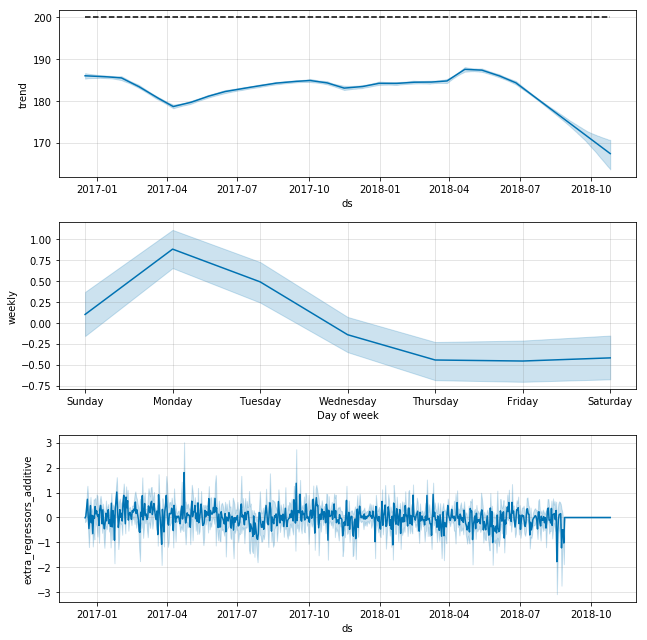

In [146]:
forecast = prophet_final.predict(future)
fig = prophet_final.plot_components(forecast)

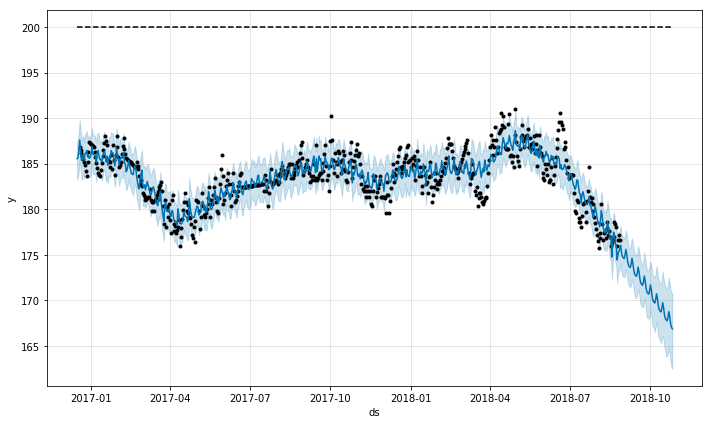

In [147]:
fig = prophet_final.plot(forecast)

In [148]:
forecast.tail(75)

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,Calories_Breakfast,Calories_Breakfast_lower,Calories_Breakfast_upper,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
605,2018-08-13,177.646655,200,176.426143,180.903366,177.250908,178.055780,0.131052,-0.684969,1.027868,...,0.101337,-0.496049,0.766450,0.878588,0.652223,1.108182,0.0,0.0,0.0,178.626580
606,2018-08-14,177.507422,200,176.101921,180.360473,177.101044,177.931936,-0.023026,-0.180597,0.120350,...,0.137661,-0.216122,0.509516,0.487943,0.240714,0.724353,0.0,0.0,0.0,178.133026
607,2018-08-15,177.368189,200,175.307720,179.537943,176.956782,177.806198,-0.085723,-0.672343,0.448048,...,0.158687,-0.338867,0.658597,-0.143329,-0.351574,0.068510,0.0,0.0,0.0,177.383547
608,2018-08-16,177.228956,200,174.487775,178.898258,176.804306,177.683401,0.025564,-0.133617,0.200506,...,-0.082830,-0.538730,0.363973,-0.445084,-0.685864,-0.230326,0.0,0.0,0.0,176.701042
609,2018-08-17,177.089723,200,174.758532,179.047456,176.648029,177.558361,0.057101,-0.298449,0.447854,...,0.284581,-0.078948,0.633559,-0.457270,-0.705334,-0.212864,0.0,0.0,0.0,176.917034
610,2018-08-18,176.950491,200,172.279098,177.161883,176.502995,177.432262,-0.003903,-0.030615,0.020402,...,-1.770072,-3.072942,-0.447137,-0.419746,-0.675761,-0.153498,0.0,0.0,0.0,174.760672
611,2018-08-19,176.811258,200,173.884894,178.544754,176.359386,177.298918,-0.039641,-0.310910,0.207190,...,-0.649925,-1.723587,0.306938,0.098899,-0.159031,0.367605,0.0,0.0,0.0,176.260231
612,2018-08-20,176.672025,200,175.392606,179.663759,176.198631,177.171537,0.013025,-0.068077,0.102157,...,-0.079954,-0.649300,0.564509,0.878588,0.652223,1.108182,0.0,0.0,0.0,177.470659
613,2018-08-21,176.532792,200,175.199646,179.256777,176.043756,177.044595,0.013025,-0.068077,0.102157,...,0.112716,-0.439501,0.645731,0.487943,0.240714,0.724353,0.0,0.0,0.0,177.133451
614,2018-08-22,176.393559,200,174.196903,178.585731,175.893963,176.917654,-0.035565,-0.278946,0.185889,...,0.137476,-0.339914,0.616742,-0.143329,-0.351574,0.068510,0.0,0.0,0.0,176.387706


In [154]:
ninety_day_forecast = prophet_forecast(df,periods=90)

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [206]:
ninety_day_forecast.to_pickle("Models/Prophet_90_Forecast.pkl")

In [156]:
ninety_day_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Calories_Breakfast,Calories_Breakfast_lower,Calories_Breakfast_upper,Calories_Dinner,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-12-16,186.013950,183.431590,187.686087,185.338850,186.644781,-0.012211,-0.095773,0.063823,0.133661,...,-0.012360,-0.187169,0.160530,-0.457270,-0.705334,-0.212864,0.0,0.0,0.0,185.544320
1,2016-12-17,186.005891,183.544403,187.724617,185.359191,186.610665,0.037046,-0.193629,0.290561,0.026998,...,0.052531,-0.139076,0.258591,-0.419746,-0.675761,-0.153498,0.0,0.0,0.0,185.638676
2,2016-12-18,185.997832,184.169495,188.593048,185.390132,186.575022,-0.019139,-0.150109,0.100032,-0.228822,...,0.395485,0.024481,0.800843,0.098899,-0.159031,0.367605,0.0,0.0,0.0,186.492216
3,2016-12-19,185.989773,185.374098,189.795906,185.424175,186.540842,-0.052995,-0.415652,0.276989,0.760737,...,0.730135,0.249019,1.269079,0.878588,0.652223,1.108182,0.0,0.0,0.0,187.598496
4,2016-12-20,185.981714,184.208012,188.876052,185.449312,186.512861,0.033401,-0.174579,0.261974,0.266253,...,0.069196,-0.596908,0.737095,0.487943,0.240714,0.724353,0.0,0.0,0.0,186.538853
5,2016-12-21,185.973656,183.382291,187.751538,185.456485,186.486652,0.144908,-0.757390,1.136544,0.073801,...,-0.443675,-1.186601,0.311681,-0.143329,-0.351574,0.068510,0.0,0.0,0.0,185.386651
6,2016-12-22,185.965597,183.465195,187.525393,185.457329,186.450154,0.018511,-0.096751,0.145184,0.109458,...,0.009644,-0.444942,0.449515,-0.445084,-0.685864,-0.230326,0.0,0.0,0.0,185.530157
7,2016-12-23,185.957538,183.905626,188.220563,185.459306,186.429930,-0.024249,-0.190186,0.126740,0.133661,...,0.474661,0.063081,0.825273,-0.457270,-0.705334,-0.212864,0.0,0.0,0.0,185.974929
8,2016-12-24,185.949479,183.199753,187.233914,185.470634,186.409752,-0.001082,-0.008486,0.005655,0.026998,...,-0.209955,-0.657359,0.236003,-0.419746,-0.675761,-0.153498,0.0,0.0,0.0,185.319778
9,2016-12-25,185.941420,183.912637,188.182150,185.475899,186.385399,0.028144,-0.147100,0.220739,-0.228822,...,0.084135,-0.152447,0.358460,0.098899,-0.159031,0.367605,0.0,0.0,0.0,186.124454


In [161]:
ninety_day_forecast.iloc[709]

ds                                   2018-11-25 00:00:00
trend                                            163.166
yhat_lower                                       156.161
yhat_upper                                       170.291
trend_lower                                      156.308
trend_upper                                      169.879
Calories_Breakfast                           9.18781e-06
Calories_Breakfast_lower                    -4.80219e-05
Calories_Breakfast_upper                     7.20619e-05
Calories_Dinner                             -0.000109942
Calories_Dinner_lower                       -0.000188167
Calories_Dinner_upper                       -2.63143e-05
Calories_Lunch                              -2.41087e-05
Calories_Lunch_lower                        -0.000118427
Calories_Lunch_upper                         5.75462e-05
Carbohydrates_(g)_Breakfast                  0.000110098
Carbohydrates_(g)_Breakfast_lower           -0.000330176
Carbohydrates_(g)_Breakfast_upp

In [184]:
ninety_day_forecast[ninety_day_forecast['ds'] == '2018-11-25']['yhat'].values[0]

163.26604308581105

In [208]:
import pickle

pickle.dump(prophet_final, open("Models/Prophet_Final.pkl", 'wb'))

In [194]:
df.describe()['Protein_(g)_Breakfast']['mean']

23.22047111735793

In [203]:
example = {
  'Steps': df.describe()['Steps']['mean'],  
  'Minutes_Sedentary': df.describe()['Minutes_Sedentary']['mean'],    
  'Minutes_Lightly_Active': df.describe()['Minutes_Lightly_Active']['mean'],    
  'Minutes_Fairly_Active': df.describe()['Minutes_Fairly_Active']['mean'],  
  'Minutes_Very_Active': df.describe()['Minutes_Very_Active']['mean'],  
  'Calories_Breakfast': df.describe()['Calories_Breakfast']['mean'],
  'Saturated_Fat_Breakfast': df.describe()['Saturated_Fat_Breakfast']['mean'],    
  'Cholesterol_Breakfast': df.describe()['Cholesterol_Breakfast']['mean'],  
  'Polyunsaturated_Fat_Breakfast': df.describe()['Polyunsaturated_Fat_Breakfast']['mean'],    
  'Monounsaturated_Fat_Breakfast': df.describe()['Monounsaturated_Fat_Breakfast']['mean'],    
  'Trans_Fat_Breakfast': df.describe()['Trans_Fat_Breakfast']['mean'],  
  'Carbohydrates_(g)_Breakfast': df.describe()['Carbohydrates_(g)_Breakfast']['mean'],  
  'Sugar_Breakfast': df.describe()['Sugar_Breakfast']['mean'],    
  'Sodium_(mg)_Breakfast': df.describe()['Sodium_(mg)_Breakfast']['mean'],  
  'Protein_(g)_Breakfast': df.describe()['Protein_(g)_Breakfast']['mean'],    
  'Calories_Lunch': df.describe()['Calories_Lunch']['mean'],    
  'Saturated_Fat_Lunch': df.describe()['Saturated_Fat_Lunch']['mean'],  
  'Polyunsaturated_Fat_Lunch': df.describe()['Polyunsaturated_Fat_Lunch']['mean'],    
  'Monounsaturated_Fat_Lunch': df.describe()['Monounsaturated_Fat_Lunch']['mean'],    
  'Trans_Fat_Lunch': df.describe()['Trans_Fat_Lunch']['mean'],  
  'Cholesterol_Lunch': df.describe()['Cholesterol_Lunch']['mean'],  
  'Sodium_(mg)_Lunch': df.describe()['Sodium_(mg)_Lunch']['mean'],    
  'Carbohydrates_(g)_Lunch': df.describe()['Carbohydrates_(g)_Lunch']['mean'],  
  'Sugar_Lunch': df.describe()['Sugar_Lunch']['mean'],    
  'Protein_(g)_Lunch': df.describe()['Protein_(g)_Lunch']['mean'],    
  'Calories_Dinner': df.describe()['Calories_Dinner']['mean'],  
  'Saturated_Fat_Dinner': df.describe()['Saturated_Fat_Dinner']['mean'],  
  'Polyunsaturated_Fat_Dinner': df.describe()['Polyunsaturated_Fat_Dinner']['mean'],    
  'Monounsaturated_Fat_Dinner': df.describe()['Monounsaturated_Fat_Dinner']['mean'],  
  'Trans_Fat_Dinner': df.describe()['Trans_Fat_Dinner']['mean'],    
  'Cholesterol_Dinner': df.describe()['Cholesterol_Dinner']['mean'],   
  'Sodium_(mg)_Dinner': df.describe()['Sodium_(mg)_Dinner']['mean'],    
  'Carbohydrates_(g)_Dinner': df.describe()['Carbohydrates_(g)_Dinner']['mean'],  
  'Sugar_Dinner': df.describe()['Sugar_Dinner']['mean'],    
  'Protein_(g)_Dinner': df.describe()['Protein_(g)_Dinner']['mean'],   
}

def prophet_forecast_weight(features, df, periods, date, cap=None, floor=170):
    future = prophet_final.make_future_dataframe(periods=periods)
    future['floor'] = 170
    
    steps_regressors_df = df[['Date','Steps','Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
       'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
       'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
       'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Sodium_(mg)_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
       'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
       'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
       'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
       'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner']]
    
    columns = ['Steps','Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
       'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
       'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
       'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Sodium_(mg)_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
       'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
       'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
       'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
       'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner']

    future = future.merge(steps_regressors_df, left_on='ds', right_on='Date', how='left')
    
    for i in columns:
        future[i].iloc[-periods:] = features[i]
        
    forecast = prophet_final.predict(future)
    
    predicted_weight = np.round(forecast[forecast['ds'] == date]['yhat'].values[0],2)
    predicted_weight_upper = np.round(forecast[forecast['ds'] == date]['yhat_upper'].values[0],2)
    predicted_weight_lower = np.round(forecast[forecast['ds'] == date]['yhat_lower'].values[0],2)
    
    result = {
        
        'predicted_weight':predicted_weight,
        'predicted_weight_upper': predicted_weight_upper,
        'predicted_weight_lower': predicted_weight_lower
        
    }
        
    return result

In [209]:
df

,Date,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,...,Fiber_Dinner,Sugar_Dinner,Protein_(g)_Dinner,Vitamin_A_Dinner,Vitamin_C_Dinner,Calcium_Dinner,Iron_Dinner,Weight,Net_Calories,Weight_MA60
0,2016-12-16,7949.359551,6.100120,1856.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,...,4.801786,9.191071,39.676786,9.469643,16.176786,9.782143,11.300000,NaN,NaN,NaN
1,2016-12-17,5514.820225,4.235007,1855.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,...,4.600000,9.650000,42.591176,13.979412,20.058824,25.000000,24.091176,NaN,NaN,NaN
2,2016-12-18,4782.921348,3.679812,1855.0,5.146067,15.494382,702.179775,1440.0,85.123596,12.157303,...,5.353488,10.444186,45.627907,17.386047,54.534884,10.860465,23.369767,NaN,-1110.2,NaN
3,2016-12-19,6743.966292,5.175902,1855.0,4.640449,13.977528,869.786517,1440.0,127.393258,9.348315,...,10.000000,15.000000,5.000000,40.000000,125.000000,10.000000,10.000000,186.800000,-660.1,NaN
4,2016-12-20,7318.181818,5.671428,1854.0,5.215909,15.704545,911.261364,1440.0,148.397727,8.636364,...,1.900000,14.100000,47.700000,18.000000,48.800000,2.500000,25.400000,186.483333,-154.3,NaN
5,2016-12-21,7112.386364,5.472372,1854.0,3.909091,11.761364,899.102273,1440.0,155.465909,7.477273,...,4.378022,8.345055,42.856044,11.289011,16.280220,11.697802,21.106593,186.166667,-978.3,NaN
6,2016-12-22,7365.511364,5.715491,1854.0,4.420455,13.284091,857.477273,1440.0,145.545455,6.340909,...,4.000000,6.942857,31.000000,9.000000,12.935065,24.000000,23.000000,185.850000,-142.5,NaN
7,2016-12-23,7949.359551,6.100120,1853.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,...,4.801786,9.191071,39.676786,9.469643,16.176786,9.782143,11.300000,185.533333,-1036.9,NaN
8,2016-12-24,5514.820225,4.235007,1853.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,...,4.600000,9.650000,42.591176,13.979412,20.058824,25.000000,24.091176,185.216667,-903.0,NaN
9,2016-12-25,1178.000000,0.882320,2074.0,3.000000,9.000000,268.000000,1368.0,72.000000,12.157303,...,5.353488,10.444186,45.627907,17.386047,54.534884,10.860465,23.369767,184.900000,NaN,NaN


In [210]:
df.to_pickle("Data/Prophet_Forecast_DF.pkl")

In [204]:
prophet_forecast_weight(example, df, periods=90, date='2018-09-11')

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


{'predicted_weight': 174.1,
 'predicted_weight_lower': 171.88,
 'predicted_weight_upper': 176.34}

In [ ]:
nutrient_breakdown = { 
  'Calories_Breakfast': df.describe()['Calories_Breakfast']['mean'],
  'Saturated_Fat_Breakfast_per_total_fat': df.describe()['Saturated_Fat_Breakfast']['mean'],    
  'Cholesterol_Breakfast': df.describe()['Cholesterol_Breakfast']['mean'],  
  'Polyunsaturated_Fat_Breakfast': df.describe()['Polyunsaturated_Fat_Breakfast']['mean'],    
  'Monounsaturated_Fat_Breakfast': df.describe()['Monounsaturated_Fat_Breakfast']['mean'],    
  'Trans_Fat_Breakfast': df.describe()['Trans_Fat_Breakfast']['mean'],  
  'Carbohydrates_(g)_Breakfast': df.describe()['Carbohydrates_(g)_Breakfast']['mean'],  
  'Sugar_Breakfast': df.describe()['Sugar_Breakfast']['mean'],    
  'Sodium_(mg)_Breakfast': df.describe()['Sodium_(mg)_Breakfast']['mean'],  
  'Protein_(g)_Breakfast': df.describe()['Protein_(g)_Breakfast']['mean'],    
  'Calories_Lunch': df.describe()['Calories_Lunch']['mean'],    
  'Saturated_Fat_Lunch': df.describe()['Saturated_Fat_Lunch']['mean'],  
  'Polyunsaturated_Fat_Lunch': df.describe()['Polyunsaturated_Fat_Lunch']['mean'],    
  'Monounsaturated_Fat_Lunch': df.describe()['Monounsaturated_Fat_Lunch']['mean'],    
  'Trans_Fat_Lunch': df.describe()['Trans_Fat_Lunch']['mean'],  
  'Cholesterol_Lunch': df.describe()['Cholesterol_Lunch']['mean'],  
  'Sodium_(mg)_Lunch': df.describe()['Sodium_(mg)_Lunch']['mean'],    
  'Carbohydrates_(g)_Lunch': df.describe()['Carbohydrates_(g)_Lunch']['mean'],  
  'Sugar_Lunch': df.describe()['Sugar_Lunch']['mean'],    
  'Protein_(g)_Lunch': df.describe()['Protein_(g)_Lunch']['mean'],    
  'Calories_Dinner': df.describe()['Calories_Dinner']['mean'],  
  'Saturated_Fat_Dinner': df.describe()['Saturated_Fat_Dinner']['mean'],  
  'Polyunsaturated_Fat_Dinner': df.describe()['Polyunsaturated_Fat_Dinner']['mean'],    
  'Monounsaturated_Fat_Dinner': df.describe()['Monounsaturated_Fat_Dinner']['mean'],  
  'Trans_Fat_Dinner': df.describe()['Trans_Fat_Dinner']['mean'],    
  'Cholesterol_Dinner': df.describe()['Cholesterol_Dinner']['mean'],   
  'Sodium_(mg)_Dinner': df.describe()['Sodium_(mg)_Dinner']['mean'],    
  'Carbohydrates_(g)_Dinner': df.describe()['Carbohydrates_(g)_Dinner']['mean'],  
  'Sugar_Dinner': df.describe()['Sugar_Dinner']['mean'],    
  'Protein_(g)_Dinner': df.describe()['Protein_(g)_Dinner']['mean'],   
}

In [216]:
np.mean(df['Fat (g)'])

63.735540885640866

In [217]:
np.mean(df['Saturated_Fat_Breakfast'])

7.032184209948361

In [222]:
fat_breakdown = {}

mean_fat = np.mean(df['Fat (g)'])

fat_columns = ['Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
       'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
       'Trans_Fat_Breakfast', 'Sodium_(mg)_Breakfast', 'Saturated_Fat_Lunch',
       'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch','Sodium_(mg)_Lunch',
       'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
       'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner','Sodium_(mg)_Dinner']

for i in fat_columns:
    fat_breakdown[i] = np.mean(df[i]) / mean_fat
    
protein_breakdown = {}

mean_protein = np.mean(df['Protein (g)'])

protein_columns = ['Protein_(g)_Breakfast', 'Protein_(g)_Lunch','Protein_(g)_Dinner']

for i in protein_columns:
    protein_breakdown[i] = np.mean(df[i]) / mean_protein
    
carb_breakdown = {}

mean_carb = np.mean(df['Carbohydrates (g)'])

carb_columns = ['Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast','Carbohydrates_(g)_Lunch',
                         'Sugar_Lunch','Carbohydrates_(g)_Dinner','Sugar_Dinner']

for i in carb_columns:
    carb_breakdown[i] = np.mean(df[i]) / mean_carb
    
fat_breakdown

{'Cholesterol_Breakfast': 3.0451732542148,
 'Cholesterol_Dinner': 1.9275826810107415,
 'Cholesterol_Lunch': 1.694670947029432,
 'Monounsaturated_Fat_Breakfast': 0.06859272871060387,
 'Monounsaturated_Fat_Dinner': 0.055917978628825304,
 'Monounsaturated_Fat_Lunch': 0.05393495542872592,
 'Polyunsaturated_Fat_Breakfast': 0.028884263641420636,
 'Polyunsaturated_Fat_Dinner': 0.02600890188156069,
 'Polyunsaturated_Fat_Lunch': 0.04270486264725679,
 'Saturated_Fat_Breakfast': 0.11033379668913516,
 'Saturated_Fat_Dinner': 0.15055211752955644,
 'Saturated_Fat_Lunch': 0.12361168950434558,
 'Sodium_(mg)_Breakfast': 12.156954586411452,
 'Sodium_(mg)_Dinner': 18.762163153039335,
 'Sodium_(mg)_Lunch': 20.052287800149067,
 'Trans_Fat_Breakfast': 0.0036665923408400834,
 'Trans_Fat_Dinner': 0.004862902211763767,
 'Trans_Fat_Lunch': 0.0011871592424471326}

In [223]:
protein_breakdown

{'Protein_(g)_Breakfast': 0.2772985591388283,
 'Protein_(g)_Dinner': 0.5306432733162167,
 'Protein_(g)_Lunch': 0.49473667364376955}

In [224]:
carb_breakdown

{'Carbohydrates_(g)_Breakfast': 0.304894013740762,
 'Carbohydrates_(g)_Dinner': 0.4719097676913969,
 'Carbohydrates_(g)_Lunch': 0.4888133639374287,
 'Sugar_Breakfast': 0.07338558724081859,
 'Sugar_Dinner': 0.07088978302539498,
 'Sugar_Lunch': 0.07558287995452459}

In [225]:
0.3*2000*3.04517

1827.102

In [226]:
np.mean(df.Cholesterol_Breakfast)

194.08576444786743

In [227]:
np.mean(df['Fat (g)'])

63.735540885640866

In [238]:
fat_per_cal = np.mean(df['Fat (g)']) / np.mean(df['Calories'])

In [239]:
fat_per_cal

0.044349461384517216

In [243]:
## USE THIS AS MEASURE FOR FINAL BREAKFAST CHOLESTEROL

mean_fat * 3.04517 * (2000/np.mean(df['Calories']))

270.1032986485806

In [232]:
np.mean(df['Calories'])

1437.1209682355127

In [ ]:
for key, value in fat_breakdown:
    